## Hello. I am going to use King County property tax and the parcel data set to do some work.

##### My goal is to dive into the merits of taxing the improved value of the building vs. the value of the land.

##### I will make maps isolating the land appraisal value and the improved value.

##### I will also do some mapping/make a column highlighting the ratio between the land value and improved value.

###### Data --> https://data.kingcounty.gov/Property-Assessments/Real-Property-Tax-Receivables/dkna-i698/data_preview

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import h3pandas
#import h3
import geojson
import datetime

import numpy as np
import math

import folium
import folium.plugins as plugins
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime, TimeSliderChoropleth

from geojson import Feature, Point, FeatureCollection
import json

pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

In [2]:
### Import the data

tax_dataframe = gpd.read_file('C:/Users/aaron/Fun Mapping Work/Data/Georgism_Study/Parcels_for_King_County_with_Address_with_Property_Information___parcel_address_area')

## downloading so I can spatial join and trim the tax dataset
seattle_city_limits = gpd.read_file('C:/Users/aaron/Fun Mapping Work/Data/Georgism_Study/seattle_city-limits.geojson')




<Axes: >

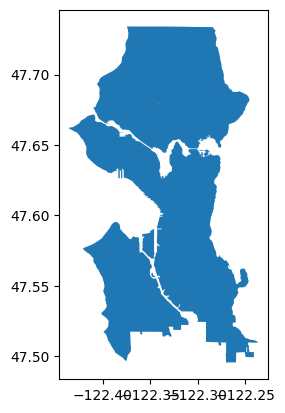

In [3]:
seattle_city_limits.plot()

In [4]:
## match CRS's of data frames

#seattle_city_limits = seattle_city_limits.set_crs(2926, allow_override=True)
#seattle_city_limits = seattle_city_limits.to_crs(2926)
tax_dataframe = tax_dataframe.to_crs(4326)
#tax_dataframe = tax_dataframe.set_crs(4326, allow_override=True)

In [5]:
#### spatial clip the tax frame with the city boundaries

tax_dataframe_trimmed = gpd.clip(tax_dataframe, seattle_city_limits)

#tax_dataframe_trimmed = gpd.overlay(tax_dataframe, seattle_city_limits)

In [23]:
#### Make Tax Per SQFT columns for both improved value and land value

tax_dataframe_trimmed['Land_Val_Per_SQFT'] = tax_dataframe_trimmed['APPRLNDVAL'] / tax_dataframe_trimmed['Shape_Area']
tax_dataframe_trimmed['Improved_Val_Per_SQFT'] = tax_dataframe_trimmed['APPR_IMPR'] / tax_dataframe_trimmed['Shape_Area']

#### Make per SQFT log scale columns for both Per SQFT and Improved

tax_dataframe_trimmed['Land_Val_Per_SQFT_Log'] = np.log10(tax_dataframe_trimmed['Land_Val_Per_SQFT'].replace(0, np.nan))
tax_dataframe_trimmed['Improved_Val_Per_SQFT_Log'] = np.log10(tax_dataframe_trimmed['Improved_Val_Per_SQFT'].replace(0, np.nan))

#tax_dataframe_trimmed['Land_Val_Per_SQFT_Log'] = math.log(tax_dataframe_trimmed['Land_Val_Per_SQFT'], 10)

In [24]:
#print (tax_dataframe.total_bounds)
#print (seattle_city_limits.total_bounds)

In [25]:
tax_dataframe_trimmed.head(1)

OBJECTID   MAJOR MINOR         PIN COMMENTS SITETYPE  \
183633    593884  052304  9010  0523049010     None       C1   

                                        SITEID ADDR_HN ADDR_PD ADDR_PT  \
183633  {79227E3D-FF10-4AE8-B034-113E5B101575}    9999    None    None   

       ADDR_SN ADDR_ST ADDR_SD  ADDR_NUM       ADDR_FULL   FULLNAME   ZIP5  \
183633     8TH     AVE       S      9999  9999 8TH AVE S  8TH AVE S  98108   

       PLUS4 CTYNAME POSTALCTYN        LAT         LON       POINT_X  \
183633  None    None    SEATTLE  47.514144 -122.323883  1.272091e+06   

              POINT_Y COUNTY KROLL KCTP_CITY KCTP_STATE      PLSS  \
183633  191111.564753   KING   303   SEATTLE         WA  NW5-23-4   

                          PROP_NAME PLAT_NAME PLAT_LOT PLAT_BLOCK   LOTSQFT  \
183633  RASMUSSEN CORP MOD OFC BLDG      None     None       None  466575.0   

       LEVYCODE   LEVY_JURIS NEW_CONSTR TAXVAL_RSN  APPRLNDVAL  APPR_IMPR  \
183633     3030  KING COUNTY          N       None  11664300.0     2000.0   

        TAX_LNDVAL  TAX_IMPR     ACCNT_NUM  KCTP_TAXYR UNIT_NUM BLDG_NUM  \
183633  11664300.0    2000.0  052304901003      2023.0     None     None   

       CONDOSITUS QTS SEC TWP RNG  PRIMARY_AD ANNEXING_C         PAAUNIQUEN  \
183633       None  NW   5  23   4           1         SE  N Highline Area Y   

       PROPTYPE ALIAS1 ALIAS2 KCA_ZONING  KCA_ACRES  \
183633        C   None   None          I  10.711088   

                                                LEGALDESC  PREUSE_COD  \
183633  POR OF FOLG DESC TR LY WITHIN GL 4 WCH LIES S ...       316.0   

                PREUSE_DES   Shape_Leng     Shape_Area  \
183633  Vacant(Industrial)  2954.473874  464823.762861   

                                                 geometry  Land_Val_Per_SQFT  \
183633  POLYGON ((-122.32735 47.51402, -122.32755 47.5...          25.094027   

        Improved_Val_Per_SQFT  Land_Val_Per_SQFT_Log  \
183633               0.004303                1.39957   

        Improved_Val_Per_SQFT_Log  Land_V_Imp_Appraisal_Ratio  
183633                  -2.366258                    0.000171

In [26]:
print ('Appraised Land Value Sum -> ', tax_dataframe_trimmed['APPRLNDVAL'].sum())
print ('Appraised Improvement Value Sum -> ', tax_dataframe_trimmed['APPR_IMPR'].sum())


Appraised Land Value Sum ->  156763537497.0
Appraised Improvement Value Sum ->  159457751625.0


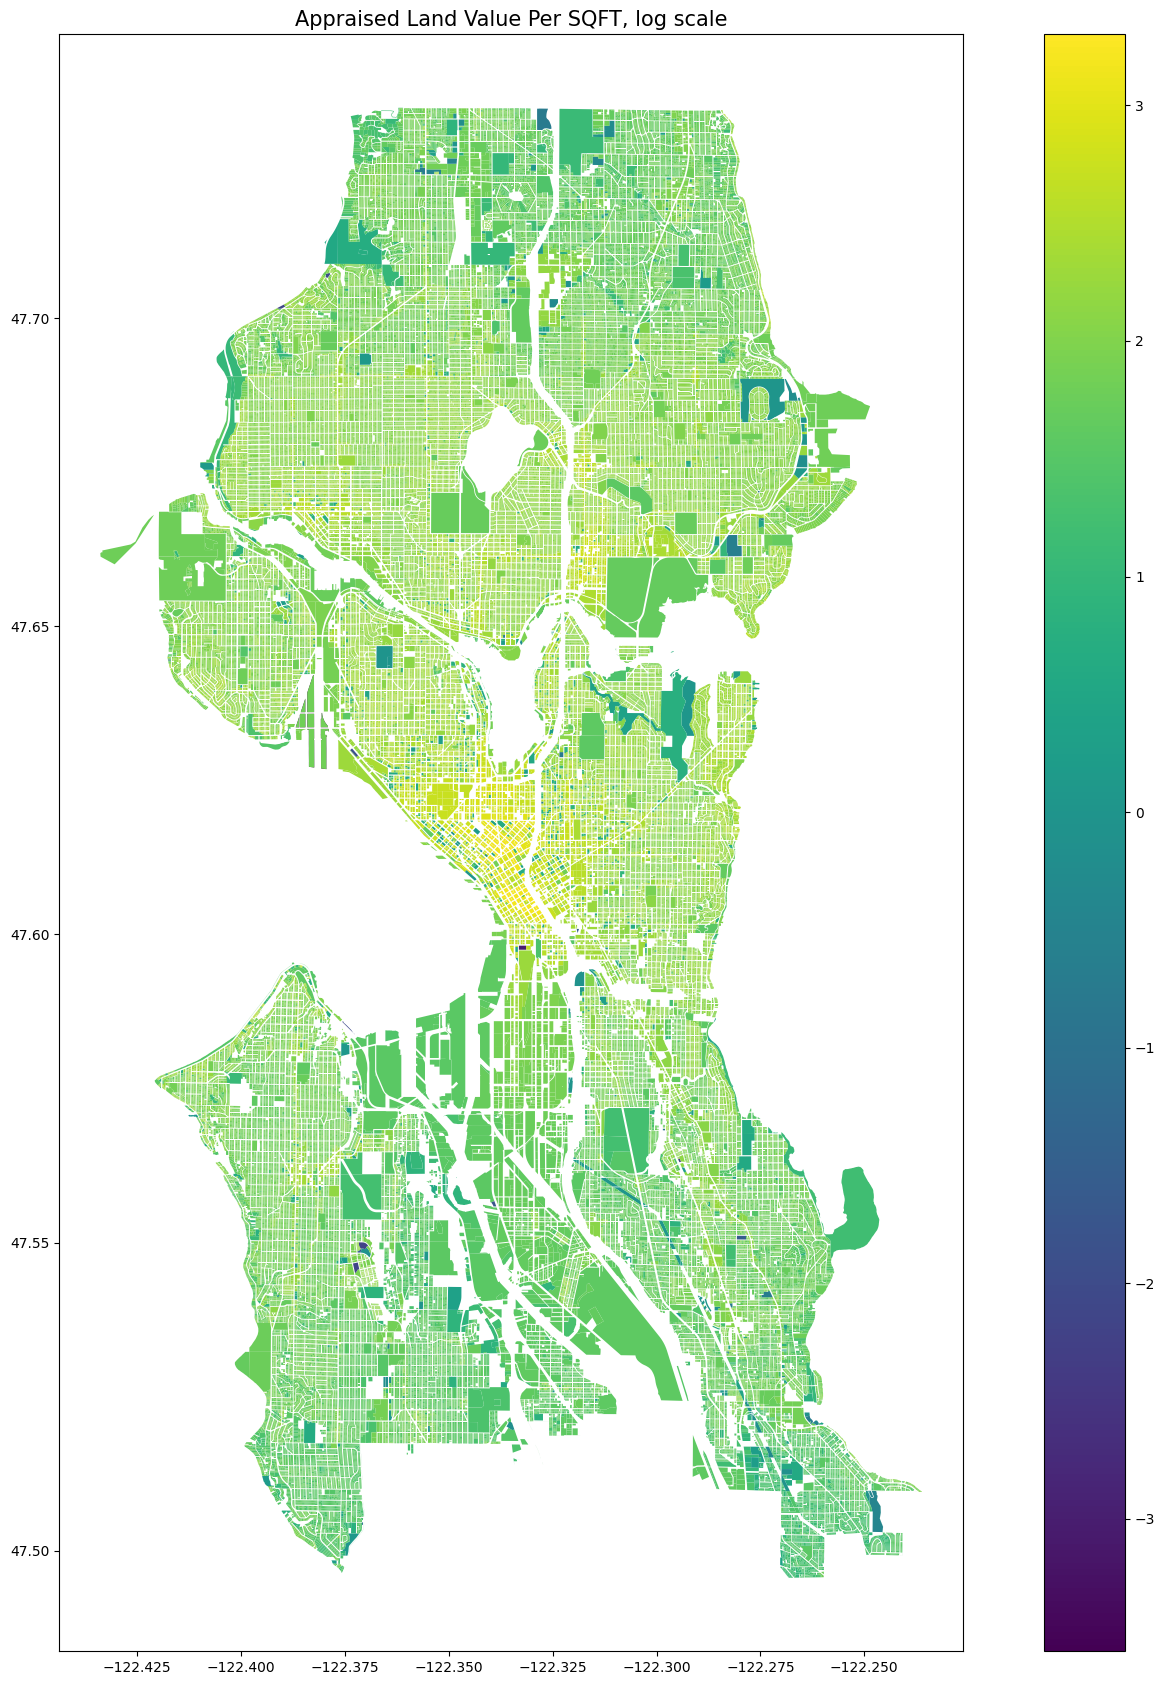

In [27]:
#min = seattle_frame['Paid_Amount'].min().astype(float)
#max = seattle_frame['Paid_Amount'].max().astype(float)


fig, ax = plt.subplots(figsize  = (21, 21))

tax_dataframe_trimmed.plot(column = 'Land_Val_Per_SQFT_Log',
                    cmap = 'viridis',
                    legend = True,
                   # norm=plt.colors.LogNorm(vmin = 1.0, vmax = max),
                    ax = ax)

aprraised_land_val = ax.set_title("Appraised Land Value Per SQFT, log scale", fontsize=15)

Text(0.5, 1.0, 'Appraised Improved Val paid by Parcel, Per SQFT, log scale')

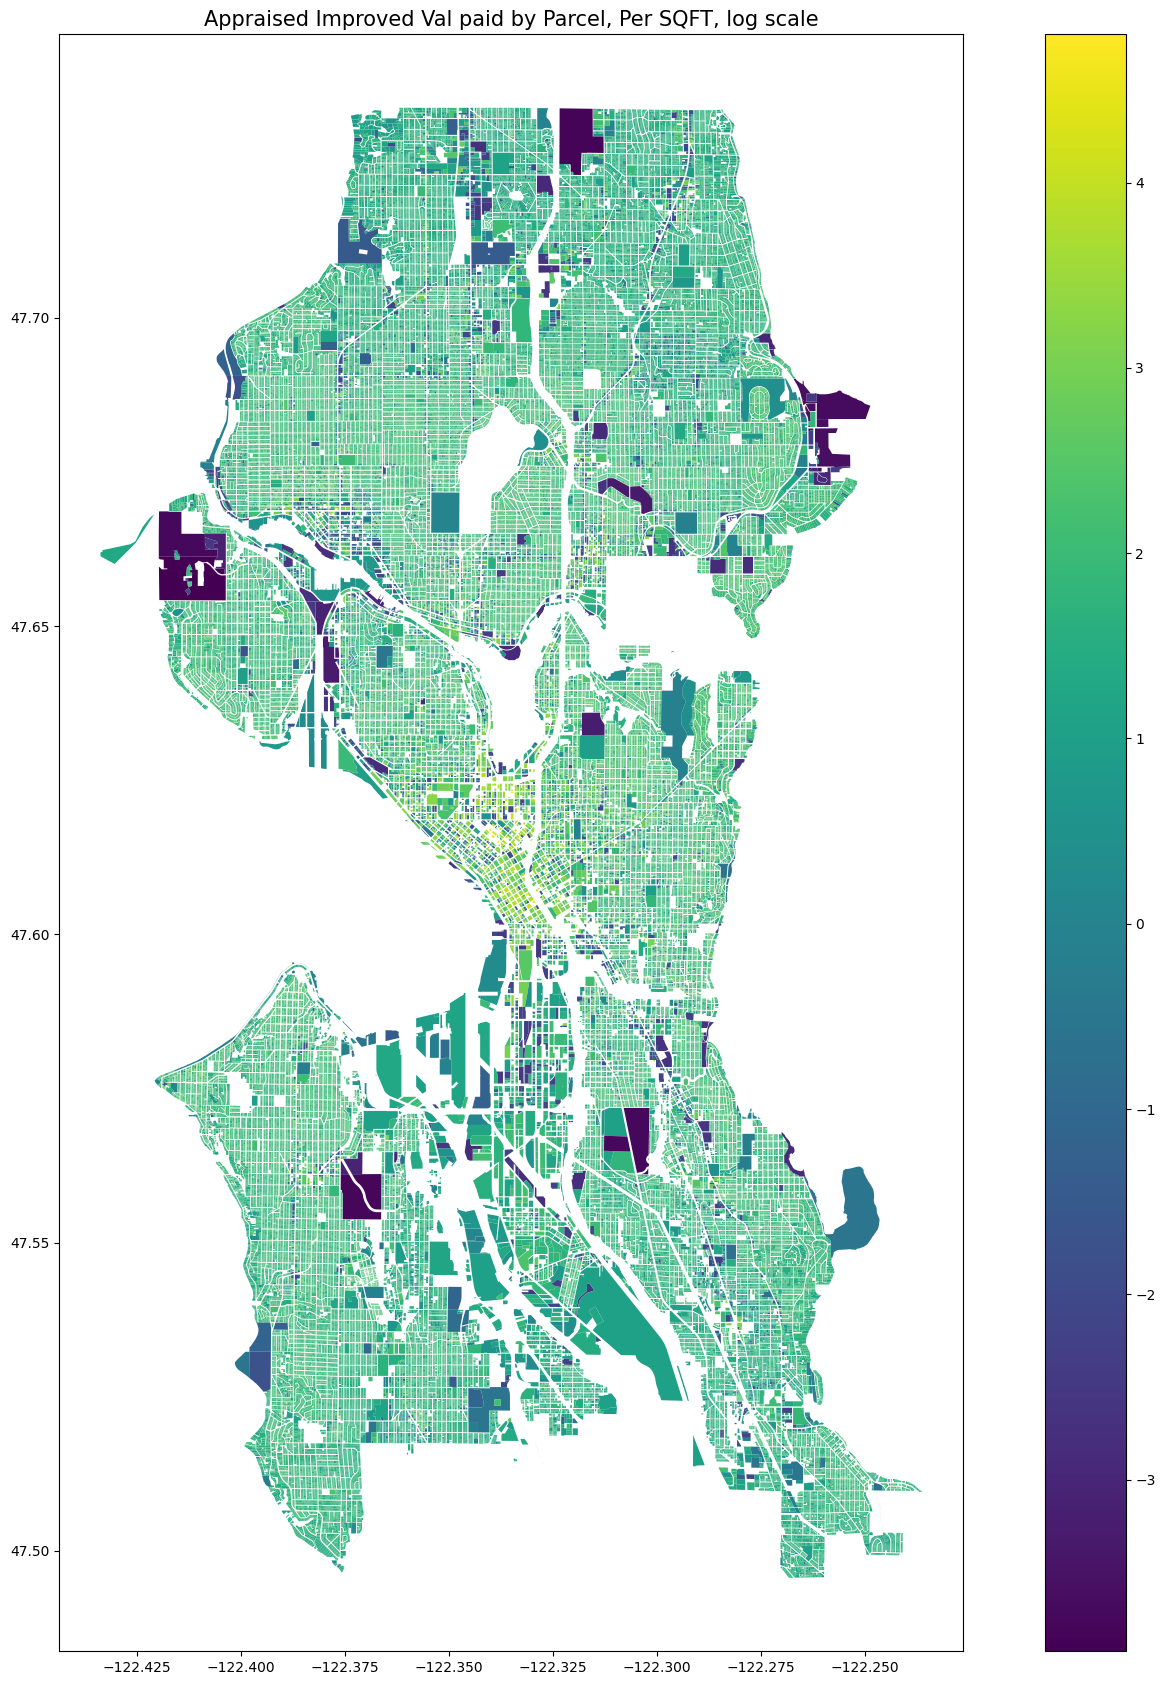

In [28]:
fig, ax = plt.subplots(figsize  = (21, 21))

tax_dataframe_trimmed.plot(column = 'Improved_Val_Per_SQFT_Log',
                    cmap = 'viridis',
                    legend = True,
                   # norm=plt.colors.LogNorm(vmin = 1.0, vmax = max),
                    ax = ax)

ax.set_title("Appraised Improved Val paid by Parcel, Per SQFT, log scale", fontsize=15)

#### Making some bounding boxes to highlight specific neighborhoods/areas.

In [29]:
tax_dataframe_trimmed['Land_V_Imp_Appraisal_Ratio'] = tax_dataframe_trimmed['APPR_IMPR'] / tax_dataframe_trimmed['APPRLNDVAL']

## round the Land_V_Imp_Appraisal_Ratio column

#tax_dataframe_trimmed['Land_V_Imp_Appraisal_Ratio'] = tax_dataframe_trimmed['Land_V_Imp_Appraisal_Ratio'].round(2)
#tax_dataframe_trimmed['Land_V_Imp_Appraisal_Ratio'] = tax_dataframe_trimmed['Land_V_Imp_Appraisal_Ratio'] + 1

In [53]:
def make_a_bounding_box(southern_lat, northern_lat, western_long, eastern_long):
    Lat_Mask = (tax_dataframe_trimmed['LAT'] > southern_lat) & (tax_dataframe_trimmed['LAT'] < northern_lat)
    Long_Mask = (tax_dataframe_trimmed['LON'] > western_long) & (tax_dataframe_trimmed['LON'] < eastern_long)
    
    bound_frame = tax_dataframe_trimmed[Lat_Mask & Long_Mask]

    return bound_frame
    

In [54]:
#Roosevelt_frame = make_a_bounding_box(47.6741, 47.6795, -122.3200, -122.3065)

In [85]:
#Bounded_Frame = make_a_bounding_box(47.5991, 47.6269, -122.3607, -122.2698) ## Central Seattle (Downtown/Caphill/more coordinates
#Bounded_Frame = make_a_bounding_box(47.6016, 47.6150, -122.3446, -122.3273) ## Downtown coordinates
#Bounded_Frame = make_a_bounding_box(47.5536, 47.5662, -122.2981, -122.2828) ## Columbia City Light rail station area
#Bounded_Frame = make_a_bounding_box(47.5730, 47.5830, -122.3146, -122.3068) ## Beacon hill light rail station area
Bounded_Frame = make_a_bounding_box(47.5575, 47.5647, -122.3896, -122.3788) ## West seattle junction area
#Bounded_Frame = make_a_bounding_box(47.6741, 47.6795, -122.3200, -122.3065) ## Roosevelt coordinates

In [86]:
Bounded_Frame.head(2)

OBJECTID   MAJOR MINOR         PIN                    COMMENTS  \
37973    119366  769740  0000  7697400000  6stry, red/wht, brick base   
98083    293250  390210  0185  3902100185                        None   

      SITETYPE                                  SITEID ADDR_HN ADDR_PD  \
37973       R2  {C7847E2D-467A-4758-A542-DFDDB78707C6}    4847    None   
98083       R1  {A7B8EA72-A4CB-431D-9939-7E45776B73F9}    4954    None   

      ADDR_PT     ADDR_SN ADDR_ST ADDR_SD  ADDR_NUM               ADDR_FULL  \
37973    None  CALIFORNIA     AVE      SW      4847  4847 CALIFORNIA AVE SW   
98083    None     ERSKINE     WAY      SW      4954     4954 ERSKINE WAY SW   

                FULLNAME   ZIP5 PLUS4  CTYNAME POSTALCTYN        LAT  \
37973  CALIFORNIA AVE SW  98116  2097  Seattle    SEATTLE  47.557690   
98083     ERSKINE WAY SW  98116  4427  Seattle    SEATTLE  47.557607   

              LON       POINT_X        POINT_Y COUNTY KROLL KCTP_CITY  \
37973 -122.387077  1.256798e+06  207301.408029   KING    61   SEATTLE   
98083 -122.389187  1.256277e+06  207281.658397   KING    61   SEATTLE   

      KCTP_STATE       PLSS              PROP_NAME              PLAT_NAME  \
37973         WA  NW23-24-3  SERRANO ON CALIFORNIA  SERRANO ON CALIFORNIA   
98083         WA  NW23-24-3                   None           KIRKWOOD ADD   

      PLAT_LOT PLAT_BLOCK  LOTSQFT LEVYCODE LEVY_JURIS NEW_CONSTR TAXVAL_RSN  \
37973     None       None  11700.0     0010       None          N       None   
98083       10          3   4500.0     0010    SEATTLE          N       None   

       APPRLNDVAL  APPR_IMPR  TAX_LNDVAL  TAX_IMPR     ACCNT_NUM  KCTP_TAXYR  \
37973     49200.0   304800.0     49200.0  304800.0  769740004007      2023.0   
98083    382000.0   453000.0    382000.0  453000.0  390210018508      2023.0   

      UNIT_NUM BLDG_NUM                              CONDOSITUS QTS SEC TWP  \
37973      404        1  4847  CALIFORNIA AVE SW UNIT 404 98116  NW  23  24   
98083     None     None                                    None  NW  23  24   

      RNG  PRIMARY_AD ANNEXING_C PAAUNIQUEN PROPTYPE ALIAS1 ALIAS2  \
37973   3           1       None       None        K   None   None   
98083   3           1       None       None        R   None   None   

       KCA_ZONING  KCA_ACRES     LEGALDESC  PREUSE_COD  \
37973  NC2-75 (M)   0.268595          None        25.0   
98083         NR3   0.103306  KIRKWOOD ADD         2.0   

                        PREUSE_DES  Shape_Leng    Shape_Area  \
37973       Condominium(Mixed Use)  426.427236  11256.255018   
98083  Single Family(Res Use/Zone)  370.808903   5843.547559   

                                                geometry  Land_Val_Per_SQFT  \
37973  POLYGON ((-122.38706 47.55764, -122.38706 47.5...           4.370903   
98083  POLYGON ((-122.38957 47.55754, -122.38952 47.5...          65.371249   

       Improved_Val_Per_SQFT  Land_Val_Per_SQFT_Log  \
37973              27.078278               0.640571   
98083              77.521402               1.815387   

       Improved_Val_Per_SQFT_Log  Land_V_Imp_Appraisal_Ratio  
37973                   1.432621                    6.195122  
98083                   1.889422                    1.185864

In [87]:
tt_with_owner_info = {'APPR_IMPR', 'APPRLNDVAL', 'Land_V_Imp_Appraisal_Ratio', 'PLAT_NAME', 'PROP_NAME', 'LEGALDESC', 'ADDR_FULL'}

#Bounded_Frame.explore(column = 'Land_V_Imp_Appraisal_Ratio', tooltip = tt_with_owner_info)


Bounded_Frame.explore(column = 'Improved_Val_Per_SQFT', tooltip = tt_with_owner_info)

#Bounded_Frame.explore(column = 'Land_V_Imp_Appraisal_Ratio', tooltip = tt_with_owner_info)

In [18]:
#### Ok so I made some basic tax maps. I could break this down into per SQFT but thats not what I'm focusing on here.

#### Next will be aggregating by sqft based on hexagon. 

### Gonna do some data analysis to see the most lopsided parcels by improvement

In [19]:
## all the lowest ratio lots are vacant and pay 0 in improvements
lowest_ratio_lots = tax_dataframe_trimmed[tax_dataframe_trimmed['Land_V_Imp_Appraisal_Ratio'] > 0.000005]

In [20]:
lowest_ratio_lots.head(4)

OBJECTID   MAJOR MINOR         PIN COMMENTS SITETYPE  \
183633    593884  052304  9010  0523049010     None       C1   
73642     216595  562420  0130  5624200130     None       C9   
73640     216592  562420  0170  5624200170     None       C1   
139571    430873  243370  0074  2433700074     None       C9   

                                        SITEID ADDR_HN ADDR_PD ADDR_PT  \
183633  {79227E3D-FF10-4AE8-B034-113E5B101575}    9999    None    None   
73642   {3B587D87-9D41-4B89-A2B2-6AF7C4F88B9A}    1050       S    None   
73640   {A458AC7B-6773-40FF-887A-7F11B5EAE694}     910       S    None   
139571  {42DCB46F-9261-4AD9-AE69-AAB8FFDF38B2}     860       S    None   

          ADDR_SN ADDR_ST ADDR_SD  ADDR_NUM           ADDR_FULL  \
183633        8TH     AVE       S      9999      9999 8TH AVE S   
73642        96TH      ST    None      1050      1050 S 96TH ST   
73640        96TH      ST    None       910       910 S 96TH ST   
139571  CAMBRIDGE      ST    None       860  860 S CAMBRIDGE ST   

              FULLNAME   ZIP5 PLUS4  CTYNAME POSTALCTYN        LAT  \
183633       8TH AVE S  98108  None     None    SEATTLE  47.514144   
73642        S 96TH ST  98108  None     None    SEATTLE  47.517328   
73640        S 96TH ST  98108  None     None    SEATTLE  47.517341   
139571  S CAMBRIDGE ST  98108  4920  Seattle    SEATTLE  47.518991   

               LON       POINT_X        POINT_Y COUNTY KROLL KCTP_CITY  \
183633 -122.323883  1.272091e+06  191111.564753   KING   303   SEATTLE   
73642  -122.318598  1.273419e+06  192247.517205   KING    78   SEATTLE   
73640  -122.321363  1.272736e+06  192265.584098   KING    78  ISSAQUAH   
139571 -122.320982  1.272842e+06  192865.586507   KING    78  KIRKLAND   

       KCTP_STATE       PLSS                    PROP_NAME  \
183633         WA   NW5-23-4  RASMUSSEN CORP MOD OFC BLDG   
73642          WA  SE32-24-4                   ABC Supply   
73640          WA  SE32-24-4             FRUEHAUF TRAILER   
139571         WA  SE32-24-4            Multi-Tenant Whse   

                           PLAT_NAME PLAT_LOT PLAT_BLOCK   LOTSQFT LEVYCODE  \
183633                          None     None       None  466575.0     3030   
73642           MOORES FIVE-ACRE TRS        8       None   99129.0     3030   
73640           MOORES FIVE-ACRE TRS       10       None  186563.0     3030   
139571  EXCELSIOR ACRE TRACTS NO. 02  32 & 36       None   41230.0     0010   

         LEVY_JURIS NEW_CONSTR TAXVAL_RSN  APPRLNDVAL  APPR_IMPR  TAX_LNDVAL  \
183633  KING COUNTY          N       None  11664300.0     2000.0  11664300.0   
73642   KING COUNTY          N       None   2081700.0  1631200.0   2081700.0   
73640   KING COUNTY          N       None   7462500.0   186700.0   7462500.0   
139571      SEATTLE          N       None   1649200.0  2452600.0   1649200.0   

         TAX_IMPR     ACCNT_NUM  KCTP_TAXYR UNIT_NUM BLDG_NUM CONDOSITUS QTS  \
183633     2000.0  052304901003      2023.0     None     None       None  NW   
73642   1631200.0  562420013004      2023.0     None     None       None  SE   
73640    186700.0  562420017005      2023.0     None     None       None  SE   
139571  2452600.0  243370007409      2023.0     None     None       None  SE   

       SEC TWP RNG  PRIMARY_AD ANNEXING_C         PAAUNIQUEN PROPTYPE ALIAS1  \
183633   5  23   4           1         SE  N Highline Area Y        C   None   
73642   32  24   4           1         SE  N Highline Area Y        C   None   
73640   32  24   4           1         SE  N Highline Area Y        C   None   
139571  32  24   4           1       None               None        C   None   

       ALIAS2 KCA_ZONING  KCA_ACRES  \
183633   None          I  10.711088   
73642    None          I   2.275689   
73640    None          I   4.282897   
139571   None   IG2 U/65   0.946511   

                                                LEGALDESC  PREUSE_COD  \
183633  POR OF FOLG DESC TR LY WITHIN GL 4 WCH LIES S ...       316.0   
73642   MOO

In [21]:

#break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
#tt_with_owner_info = {'APPR_IMPR', 'APPRLNDVAL', 'Land_V_Imp_Appraisal_Ratio', 'PLAT_NAME', 'PROP_NAME', 'LEGALDESC', 'ADDR_FULL'}

#lowest_ratio_lots.explore(column = 'APPRLNDVAL', tooltip = tt_with_owner_info)

In [ ]:
highest_ratio_lots = tax_dataframe_trimmed[tax_dataframe_trimmed['Land_V_Imp_Appraisal_Ratio'] > 6]

In [ ]:
tt_with_owner_info = {'APPR_IMPR', 'APPRLNDVAL', 'Land_V_Imp_Appraisal_Ratio', 'PLAT_NAME', 'PROP_NAME', 'LEGALDESC', 'ADDR_FULL'}

highest_ratio_lots.explore(column = 'APPR_IMPR', tooltip = tt_with_owner_info)

In [ ]:
tax_dataframe_trimmed.head(4)

## Hexagons!!

In [ ]:
## Use PyDeck to make some 3d Visualization!!

In [ ]:
### make centroid column  and frame to prep for H3 business.

centroid_column = tax_dataframe_trimmed['geometry'].centroid

centroid_frame = tax_dataframe_trimmed

centroid_frame['geometry'] = centroid_column

In [ ]:
hexagons = centroid_frame.h3.geo_to_h3_aggregate(9, operation = 'sum')
### make an appraised improvements to appraised landval column

hexagons['Land_V_Imp_Appraisal_Ratio'] = hexagons['APPR_IMPR'] / hexagons['APPRLNDVAL']

In [ ]:
tt = {'APPR_IMPR', 'APPRLNDVAL', 'Land_V_Imp_Appraisal_Ratio'}

hexagons.explore(column = 'Land_V_Imp_Appraisal_Ratio', tooltip = tt)

In [ ]:
hexagons.explore(column = 'APPRLNDVAL', tooltip = tt)

In [ ]:
hexagons.explore(column = 'APPR_IMPR', tooltip = tt)

In [ ]:
'''

fig, ax = plt.subplots(figsize  = (21, 21))
#hexagons = centroid_frame[centroid_frame['CITY'] == 2100].h3.geo_to_h3_aggregate(8)
hexagons = centroid_frame.h3.geo_to_h3_aggregate(8)
hexagons.plot(column = 'DVMT',
                legend = True,
                #norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 700000),
                ax = ax)
travis_county_census_shape_geo['tract_centroids'].plot()

#ax.ticklabel_format(useOffset=False)

ax.set_title("Austin DVMT", fontsize=15)

'''